In [4]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(cowplot)
    library(patchwork)
    theme_set(theme_cowplot())
})
options(repr.plot.width=15,repr.plot.height=9)

# Tables on plots

In [89]:
data <- as_tibble(mtcars, rownames = 'model')

p1 <- ggplot(data, aes(mpg, disp)) + geom_point()

## gridExtra

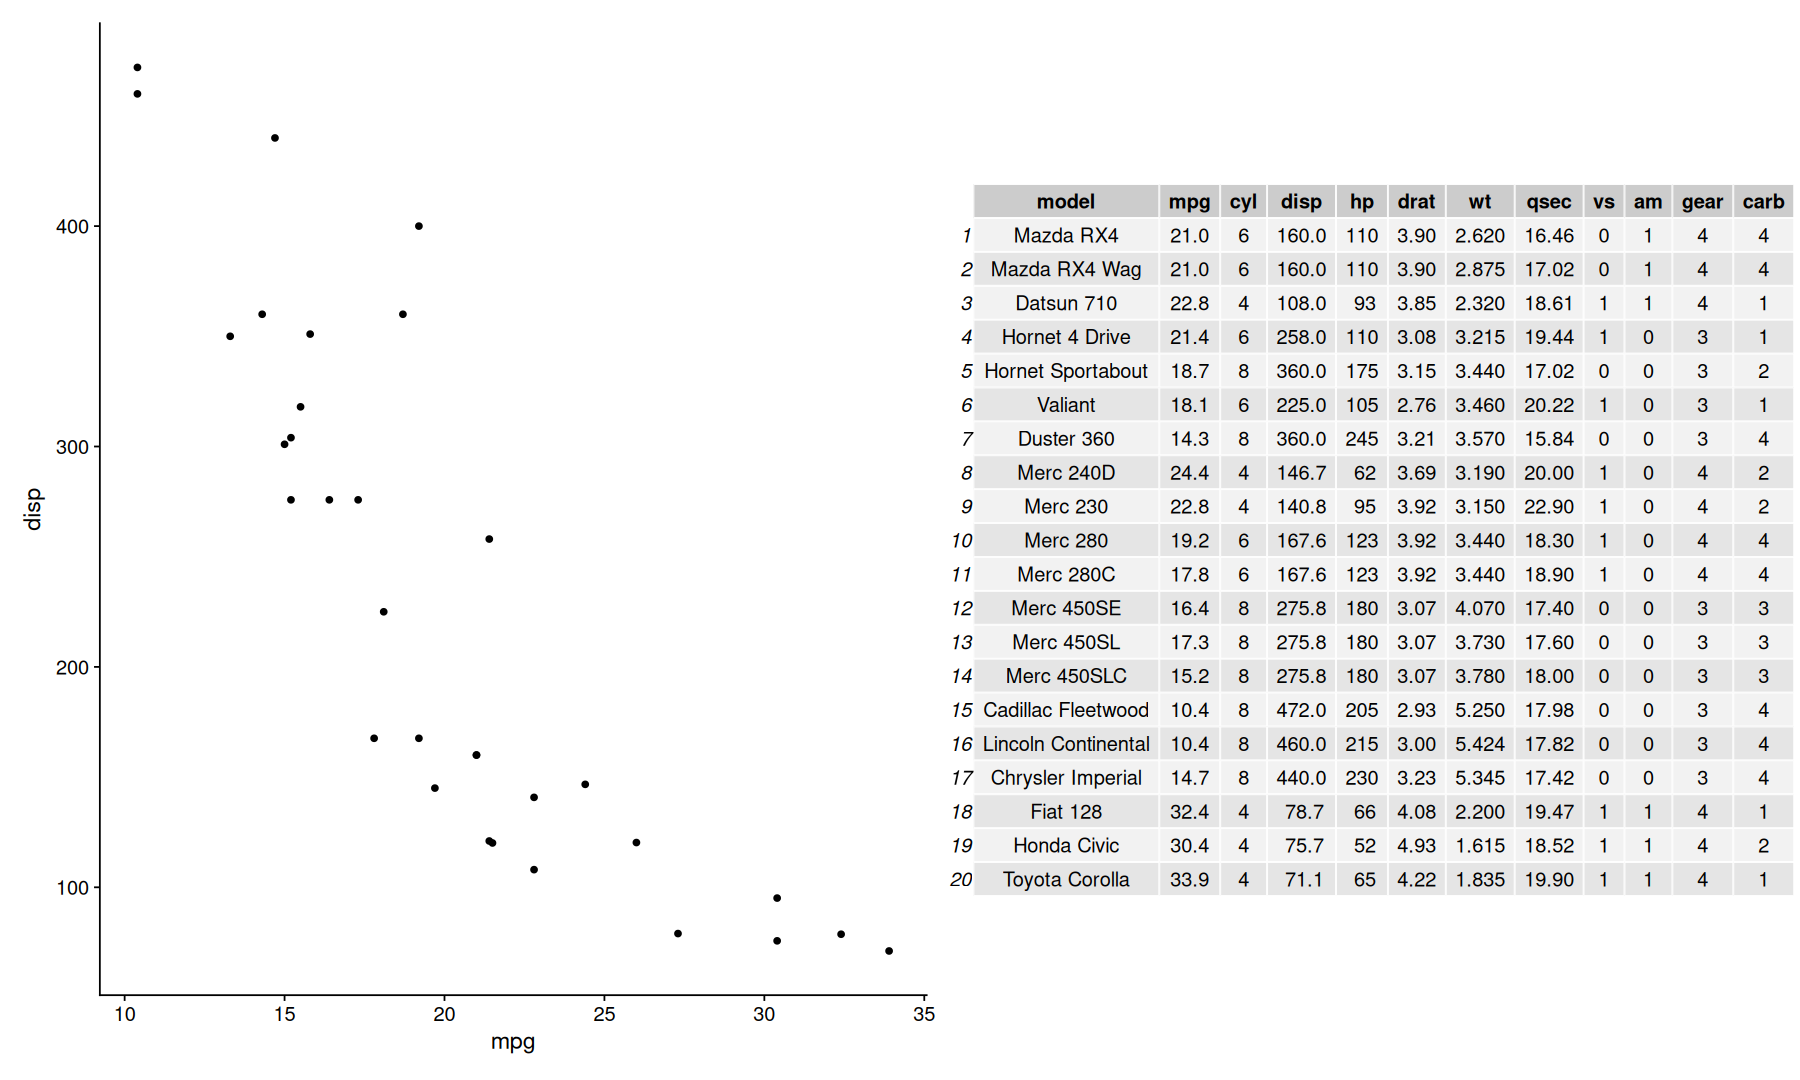

In [92]:
p1 + gridExtra::tableGrob(data[1:20,])

# flextable

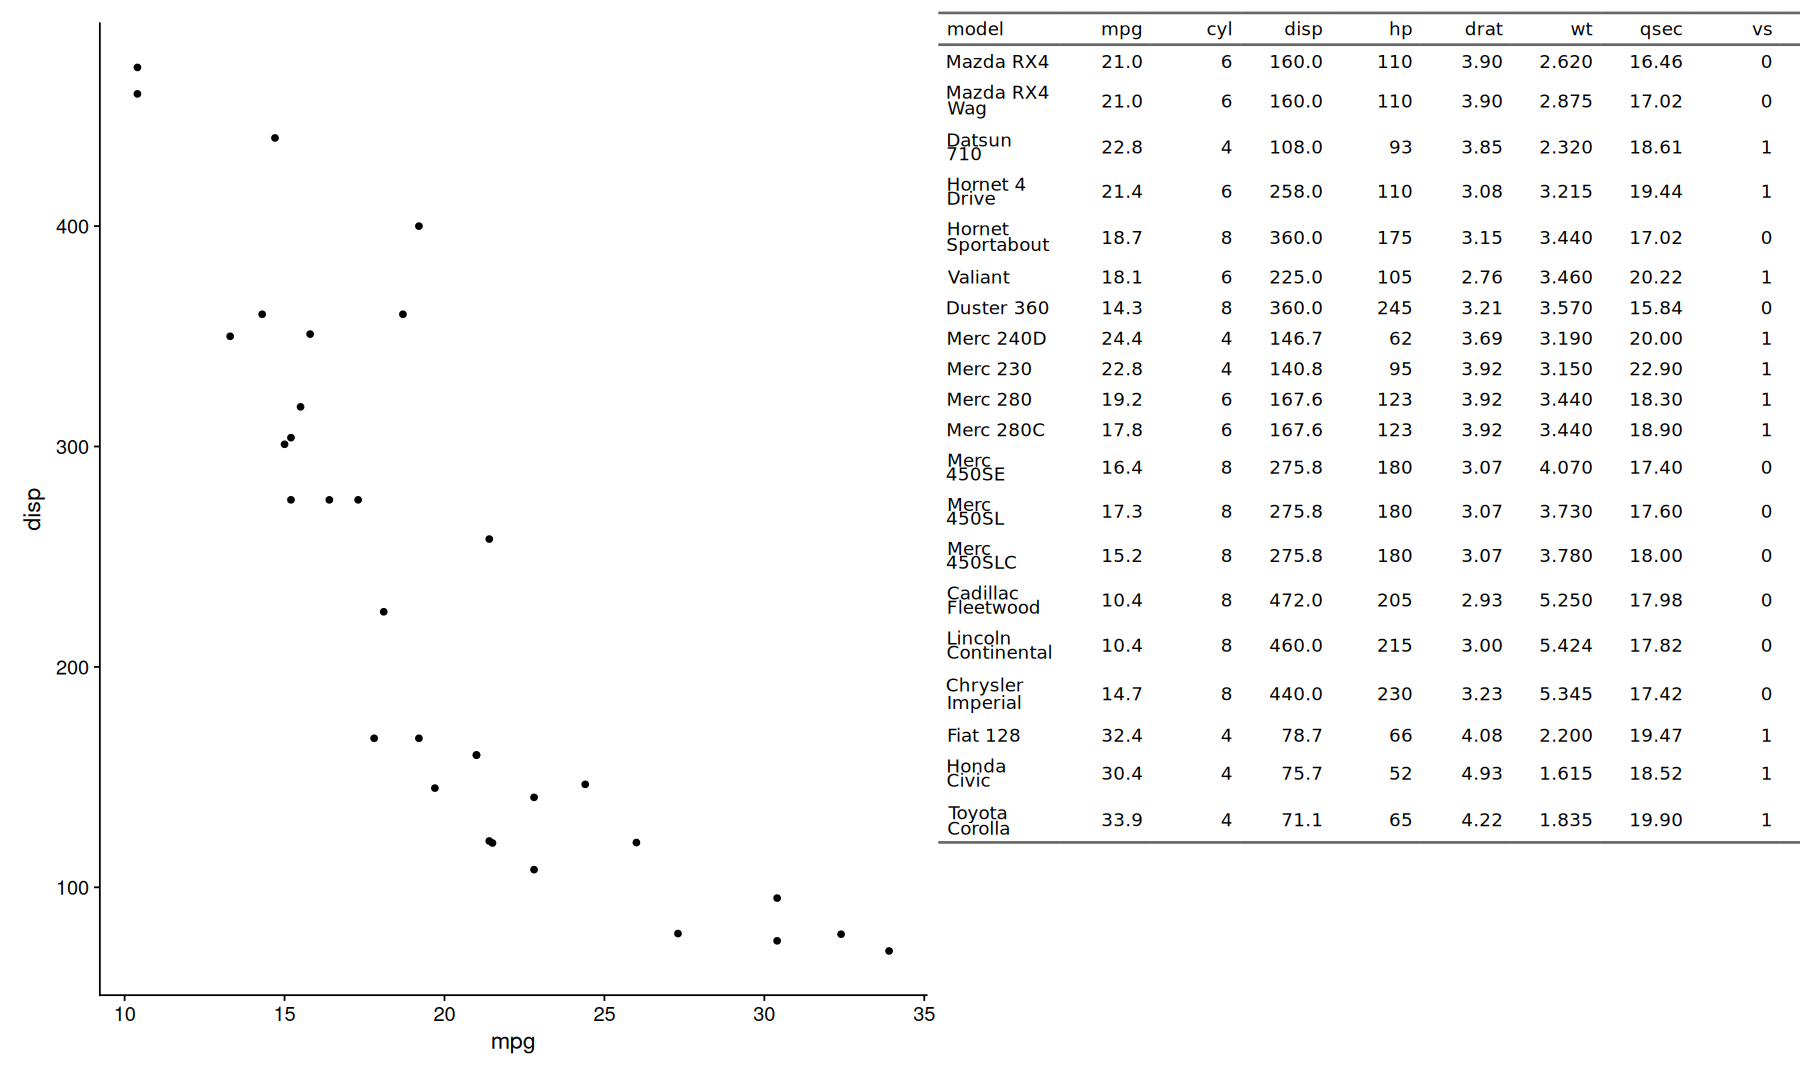

In [94]:
tg <- 
    data |>
    head(20) |>
    flextable::flextable() |>
    flextable::gen_grob(fit='fixed')

p1 + tg

# ggpp

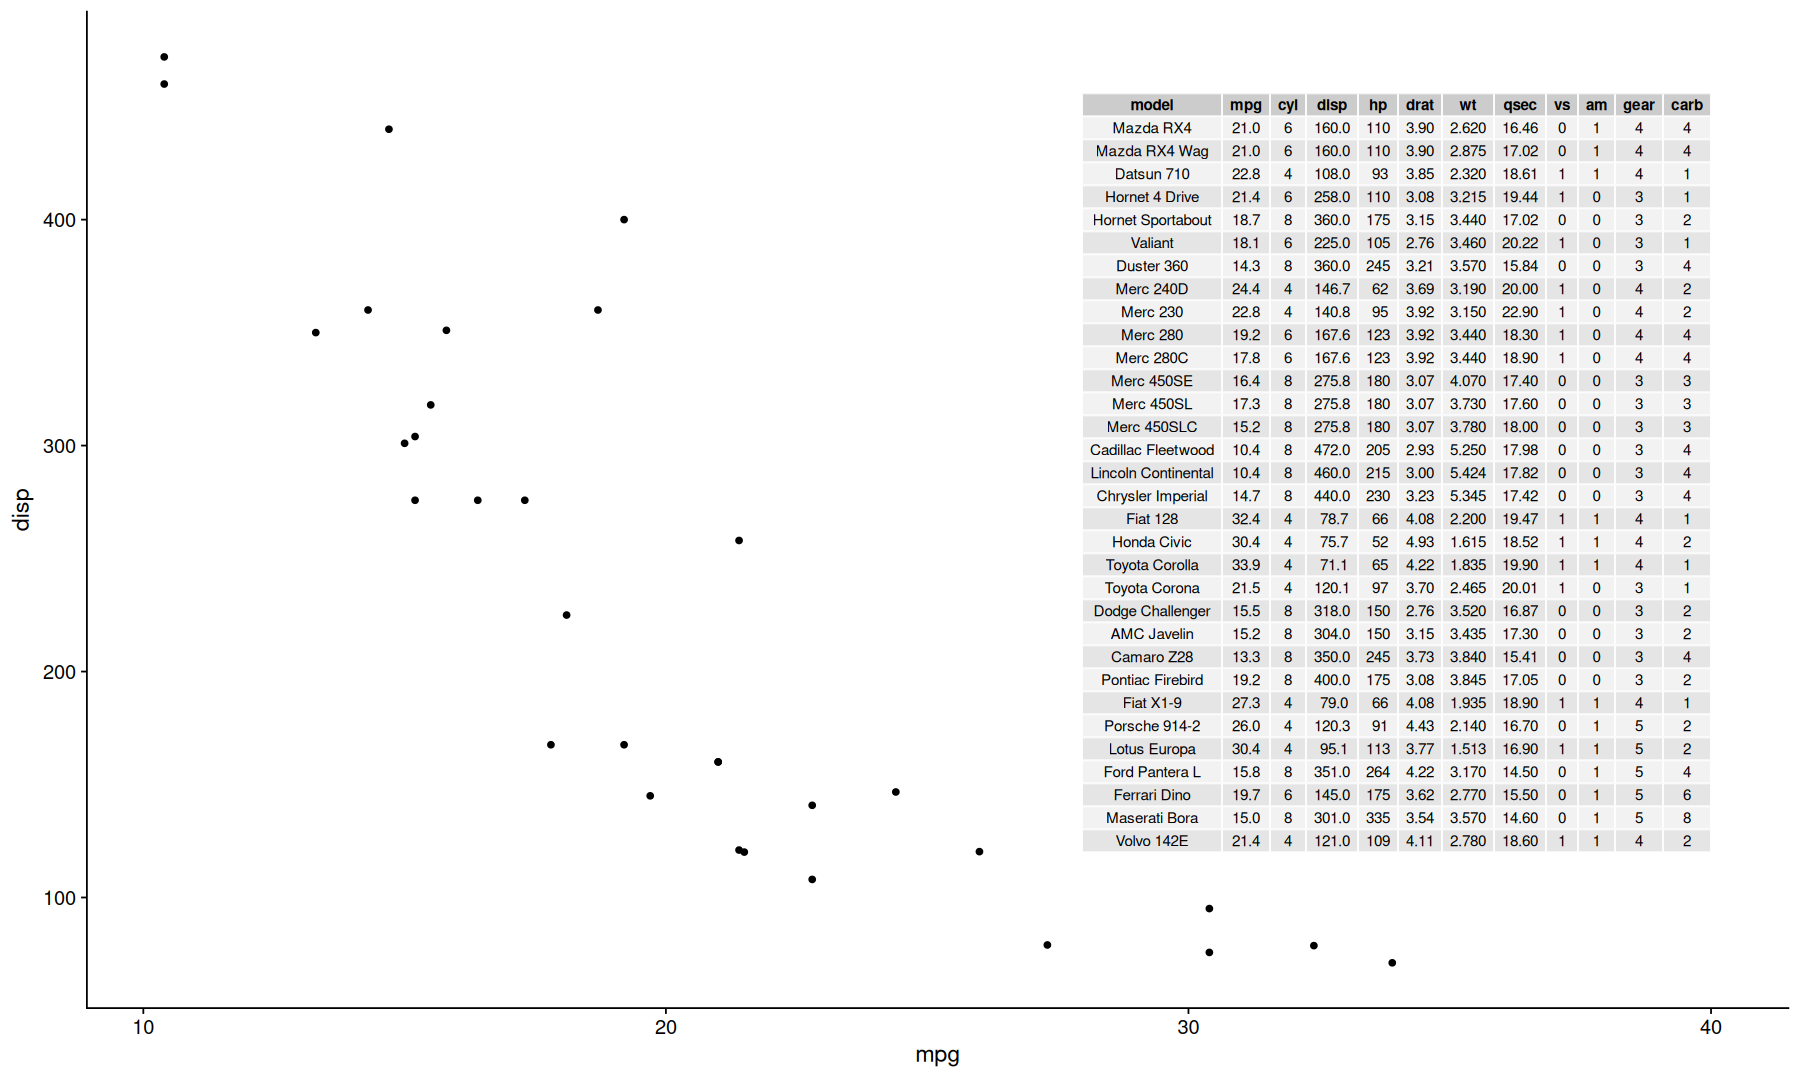

In [95]:
df <- tibble(
    x=40, y=120, 
    tb=list(data)
)

p1 + ggpp::geom_table(data=df, aes(x,y,label=tb))

# pure ggplot2

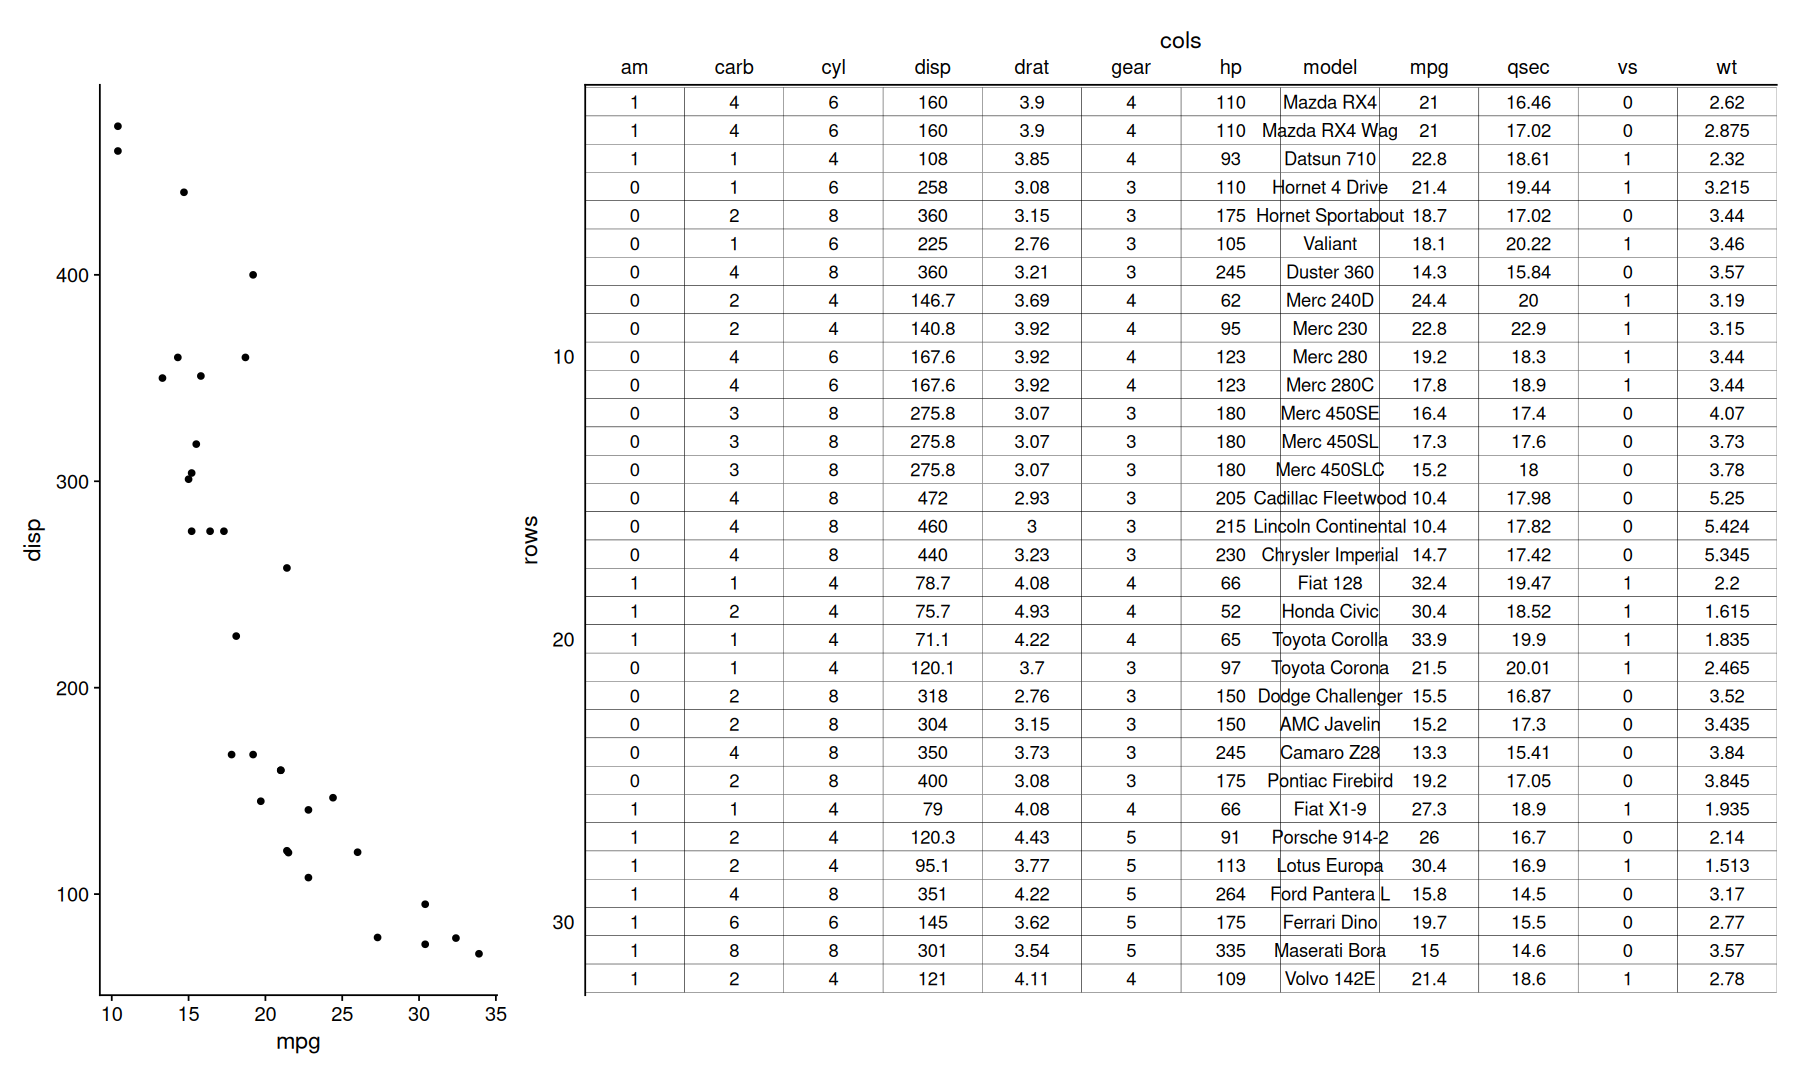

In [229]:
tp <- data |>
mutate(rows=row_number()) |>
pivot_longer(names_to = 'cols', values_to = 'vals', -rows, values_transform = as.character) |>
mutate(cs=nchar(vals)) |>
ggplot(aes(x=cols, y=rows, label=vals)) +
geom_tile(color='black', fill='white') +
geom_text() +
scale_x_discrete(expand=c(0,0), position='top') +
scale_y_reverse(expand=c(0,0.1)) +
theme(panel.spacing = unit(0,'npc')) +
theme(axis.ticks = element_blank())


p1 + tp + plot_layout(widths = c(1,3))